In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors
print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.1.0
TFP version: 0.9.0


# Variational autoencoders

## Coding tutorials

#### [1. Encoders and decoders](#tutorial1)
#### [2. Minimising Kullback-Leibler divergence](#tutorial2)
#### [3. Maximising the ELBO](#tutorial3)
#### [4. KL divergence layers](#tutorial4)

***
<a class="anchor" id="tutorial1"></a>
## Encoders and decoders

In [2]:
import tensorflow as tf
tf.random.set_seed(seed=42)

encoder = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=256,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=64,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=2)
])
decoder = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(units=64,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=256,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=28*28,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Reshape(target_shape=(28, 28))
])

autoencoder = tf.keras.Model(
inputs=encoder.input,
outputs=decoder(encoder.output)
)
autoencoder.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.RMSprop()
)

x_train = tf.random.normal(shape=(3, 28, 28))
autoencoder.fit(x=x_train, y=x_train, epochs=3)

# x_test: (1, 28, 28)
x_test = tf.random.normal(shape=(1, 28, 28))
reconstruction = autoencoder(inputs=x_test)

x_encoded = encoder(inputs=x_test)
z_decoded = decoder(inputs=x_encoded)

tf.norm(tensor=reconstruction - z_decoded)

Train on 3 samples
Epoch 1/3
3/3 [==============================] - 1s 358ms/sample - loss: 1.2297
Epoch 2/3
3/3 [==============================] - 0s 1ms/sample - loss: 1.1182
Epoch 3/3
3/3 [==============================] - 0s 32ms/sample - loss: 1.0531


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [1]:
# Load Fashion MNIST
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = \
    tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
class_names = np.array(['T-shirt/top', 'Trouser/pants',
    'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag','Ankle boot'])

4423680/4422102 [==============================] - 0s 0us/step


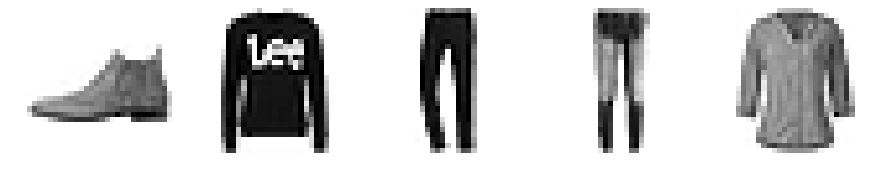

In [5]:
# Display a few examples
import matplotlib.pyplot as plt

n_examples = 1000
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]

f, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))
for j in range(len(axs)):
    axs[j].imshow(X=example_images[j], cmap='binary')
    axs[j].axis('off')
plt.show()

In [6]:
# Define the encoder
import tensorflow as tf
tf.random.set_seed(seed=42)

encoded_dim = 2
encoder = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=256,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=64,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=encoded_dim)
])

In [7]:
# Encode examples before training

pretrain_example_encodings = encoder(inputs=example_images).numpy()

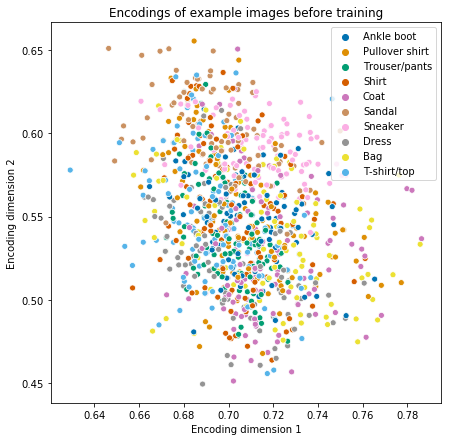

In [8]:
# Plot encoded examples before training 
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.scatterplot(ax=ax, hue=class_names[example_labels],
    x=pretrain_example_encodings[:, 0],
    y=pretrain_example_encodings[:, 1],
    palette=sns.color_palette(palette='colorblind', n_colors=10)
);
ax.set_xlabel(xlabel='Encoding dimension 1');
ax.set_ylabel(ylabel='Encoding dimension 2')
ax.set_title(label='Encodings of example images before training');
plt.show()

In [9]:
# Define the decoder
import tensorflow as tf
tf.random.set_seed(seed=42)

decoder = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(units=64, input_shape=(encoded_dim,),
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=256,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(units=28*28,
        activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Reshape(target_shape=(28, 28))
])

In [10]:
# Compile and fit the model
import tensorflow as tf
tf.random.set_seed(seed=42)

autoencoder = tf.keras.Model(
    inputs=encoder.inputs,
    outputs=decoder(encoder.outputs)
)

# Specify loss - input and output is in [0., 1.], so we can use a binary cross-entropy loss

autoencoder.compile(
    loss=tf.keras.losses.BinaryCrossentropy()
)

# Fit model - highlight that labels and input are the same

autoencoder.fit(x=x_train, y=x_train, epochs=10, batch_size=32)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.3989
Epoch 2/10
60000/60000 [==============================] - 60s 992us/sample - loss: 0.3425
Epoch 3/10
60000/60000 [==============================] - 60s 995us/sample - loss: 0.3335
Epoch 4/10
60000/60000 [==============================] - 60s 998us/sample - loss: 0.3295
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3266
Epoch 6/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3246
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3231
Epoch 8/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3219
Epoch 9/10
60000/60000 [==============================] - 60s 995us/sample - loss: 0.3209
Epoch 10/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.3201


In [11]:
# Compute example encodings after training

posttrain_example_encodings = encoder(inputs=example_images).numpy()

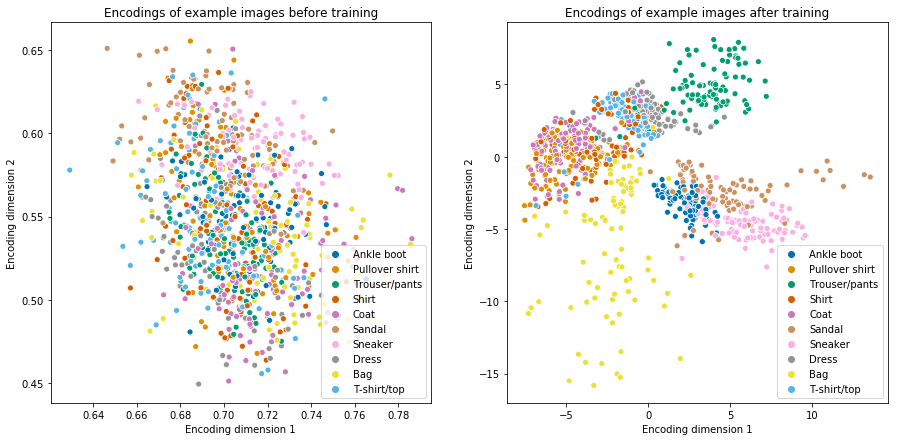

In [13]:
# Compare the example encodings before and after training
import matplotlib.pyplot as plt
import seaborn as sns

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.scatterplot(ax=axs[0], hue=class_names[example_labels],
    x=pretrain_example_encodings[:, 0],
    y=pretrain_example_encodings[:, 1],
    palette=sns.color_palette(palette='colorblind', n_colors=10)
);
sns.scatterplot(ax=axs[1], hue=class_names[example_labels],
    x=posttrain_example_encodings[:, 0],
    y=posttrain_example_encodings[:, 1],
    palette=sns.color_palette(palette='colorblind', n_colors=10));

axs[0].set_title(label='Encodings of example images before training');
axs[1].set_title(label='Encodings of example images after training');

for ax in axs: 
    ax.set_xlabel(xlabel='Encoding dimension 1')
    ax.set_ylabel(ylabel='Encoding dimension 2')
    ax.legend(loc='lower right')
    
plt.show()

In [14]:
# Compute the autoencoder's reconstructions

reconstructed_example_images = autoencoder(inputs=example_images)

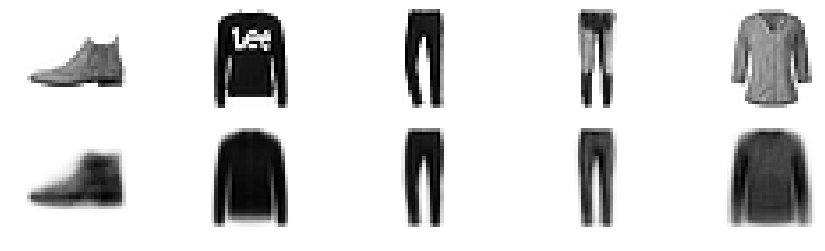

In [15]:
# Evaluate the autoencoder's reconstructions
import matplotlib.pyplot as plt

f, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 4))
for j in range(5):
    axs[0, j].imshow(X=example_images[j], cmap='binary')
    axs[1, j].imshow(cmap='binary',
        X=reconstructed_example_images[j].numpy().squeeze())
    axs[0, j].axis('off')
    axs[1, j].axis('off')
plt.show()

***
<a class="anchor" id="tutorial2"></a>
## Minimising Kullback-Leibler divergence

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [ ]:
# Define a target distribution, p



In [ ]:
# Plot the target distribution's density contours

def plot_density_contours(density, X1, X2, contour_kwargs, ax=None):
    '''
        Plots the contours of a bivariate TensorFlow density function (i.e. .prob()).
        X1 and X2 are numpy arrays of mesh coordinates.
    '''
    X = np.hstack([X1.flatten()[:, np.newaxis], X2.flatten()[:, np.newaxis]])
    density_values = np.reshape(density(X).numpy(), newshape=X1.shape)
    
    if ax==None:
        _, ax = plt.subplots(figsize=(7, 7))
    
    ax.contour(X1, X2, density_values, **contour_kwargs)
    return(ax)

x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
X1, X2 = np.meshgrid(x1, x2)
f, ax = plt.subplots(1, 1, figsize=(7, 7))

# Density contours are linearly spaced
contour_levels = np.linspace(1e-4, 10**(-0.8), 20) # specific to this seed
ax = plot_density_contours(p.prob, X1, X2, 
                           {'levels':contour_levels, 
                            'cmap':'cividis'}, ax=ax)
ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); 
ax.set_title('Density contours of target distribution, $p$')
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$');

In [ ]:
# Initialize an approximating distribution, q, that has diagonal covariance



In [ ]:
# Define a function for the Kullback-Leibler divergence



In [ ]:
# Run a training loop that computes KL[q || p], updates q's parameters using its gradients

num_train_steps = 250
opt = tf.keras.optimizers.Adam(learning_rate=.01)
for i in range(num_train_steps):
    
    # Compute the KL divergence and its gradients
    q_loss, grads = loss_and_grads(q, p)
    
    # Update the trainable variables using the gradients via the optimizer
    opt.apply_gradients(zip(grads, q.trainable_variables))
    
    # Plot the updated density 
    if ((i + 1) % 10 == 0):
        clear_output(wait=True)
        ax = plot_density_contours(p.prob, X1, X2,
                                   {'levels':contour_levels,
                                    'cmap':'cividis', 'alpha':0.5})
        ax = plot_density_contours(q.prob, X1, X2, 
                                   {'levels':contour_levels,
                                    'cmap':'plasma'}, ax=ax)
        ax.set_title('Density contours of $p$ and $q$\n' +
                     'Iteration ' + str(i + 1) + '\n' +
                      '$D_{KL}[q \ || \ p] = ' + 
                      str(np.round(q_loss.numpy(), 4)) + '$',
                      loc='left')
        plt.pause(.01)

In [ ]:
# Re-fit the distribution, this time fitting q_rev by minimising KL[p || q_rev]



In [ ]:
# Edit loss_and_grads function

In [ ]:
# Re-initialize optimizer, run training loop

opt = tf.keras.optimizers.Adam(learning_rate=.01)
for i in range(num_train_steps):
    # Reverse the KL divergence terms - compute KL[p || q_rev] 
    q_rev_loss, grads = loss_and_grads(q_rev, p, reverse=True)
    
    # Update the trainable variables using the gradients via the optimizer
    opt.apply_gradients(zip(grads, q_rev.trainable_variables))
    
    # Plot the updated density 
    if ((i + 1) % 10 == 0):
        clear_output(wait=True)
        ax = plot_density_contours(p.prob, X1, X2,
                                   {'levels':contour_levels,
                                    'cmap':'cividis', 'alpha':0.5})
        ax = plot_density_contours(q_rev.prob, X1, X2, 
                                   {'levels':contour_levels,
                                    'cmap':'plasma'}, ax=ax)
        ax.set_title('Density contours of $p$ and $q_{rev}$\n' +
                     'Iteration ' + str(i + 1) + '\n' +
                      '$D_{KL}[p \ || \ q_{rev}] = ' + 
                      str(np.round(q_rev_loss.numpy(), 4)) + '$',
                      loc='left')
        plt.pause(.01)

In [ ]:
# Plot q and q_rev alongside one another

f, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0] = plot_density_contours(p.prob, X1, X2,
                           {'levels':contour_levels,
                            'cmap':'cividis', 'alpha':0.5}, ax=axs[0])
axs[0] = plot_density_contours(q.prob, X1, X2, 
                           {'levels':contour_levels,
                            'cmap':'plasma'}, ax=axs[0])
axs[0].set_title('Density contours of $p$ and $q$\n' +
              '$D_{KL}[q \ || \ p] = ' + str(np.round(q_loss.numpy(), 4)) + '$',
              loc='left')

axs[1] = plot_density_contours(p.prob, X1, X2,
                           {'levels':contour_levels,
                            'cmap':'cividis', 'alpha':0.5}, ax=axs[1])
axs[1] = plot_density_contours(q_rev.prob, X1, X2, 
                           {'levels':contour_levels,
                            'cmap':'plasma'}, ax=axs[1])
axs[1].set_title('Density contours of $p$ and $q_{rev}$\n' +
              '$D_{KL}[p \ || \ q_{rev}] = ' + str(np.round(q_rev_loss.numpy(), 4)) + '$',
              loc='left');

---
<a class="anchor" id="tutorial3"></a>
## Maximising the ELBO 

Review of terminology:
- $p(z)$ = prior
- $q(z|x)$ = encoding distribution
- $p(x|z)$ = decoding distribution

\begin{align}
\log p(x) &\geq \mathrm{E}_{Z \sim q(z | x)}\big[−\log q(Z | x) + \log p(x, Z)\big]\\
          &= - \mathrm{KL}\big[ \ q(z | x) \ || \ p(z) \ \big] + \mathrm{E}_{Z \sim q(z | x)}\big[\log p(x | Z)\big] 
\end{align}

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import Fasion MNIST, make it a TensorFlow Dataset

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
example_x = x_test[:16]

batch_size = 64
x_train = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)

In [ ]:
# Define the encoding distribution, q(z|x)



In [ ]:
# Pass an example image through the network - should return a batch of MultivariateNormalDiags.



In [ ]:
# Define the decoding distribution, p(x|z)



In [ ]:
# Pass a batch of examples to the decoder



In [ ]:
# Define the prior, p(z) - a standard bivariate Gaussian



The loss function we need to estimate is

\begin{equation}
-\mathrm{ELBO} = \mathrm{KL}[ \ q(z|x) \ || \ p(z) \ ] - \mathrm{E}_{Z \sim q(z|x)}[\log p(x|Z)]\\
\end{equation}

where $x = (x_1, x_2, \ldots, x_n)$ refers to all observations, $z = (z_1, z_2, \ldots, z_n)$ refers to corresponding latent variables.

Assumed independence of examples implies that we can write this as

\begin{equation}
\sum_j \mathrm{KL}[ \ q(z_j|x_j) \ || \ p(z_j) \ ] - \mathrm{E}_{Z_j \sim q(z_j|x_j)}[\log p(x_j|Z_j)]
\end{equation}

In [ ]:
# Specify the loss function, an estimate of the -ELBO



In [ ]:
# Define a function that returns the loss and its gradients



In [ ]:
# Compile and train the model

num_epochs = 5
opt = tf.keras.optimizers.Adam()
for i in range(num_epochs):
    for train_batch in x_train:
        current_loss, grads = get_loss_and_grads(train_batch)
        opt.apply_gradients(zip(grads, encoder.trainable_variables
                                       + decoder.trainable_variables))
        
    print('-ELBO after epoch {}: {:.0f}'.format(i+1, current_loss.numpy())

In [ ]:
# Connect encoder and decoder, compute a reconstruction



In [ ]:
# Plot examples against reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

In [ ]:
# Generate an example - sample a z value, then sample a reconstruction from p(x|z)



In [ ]:
# Display generated_x

f, axs = plt.subplots(1, 6, figsize=(16, 5))
for j in range(6):
    axs[j].imshow(generated_x[j, :, :].numpy().squeeze(), cmap='binary')
    axs[j].axis('off')

In [ ]:
# -ELBO estimate using an estimate of the KL divergence

def loss(x, encoding_dist, sampled_decoding_dist,
         prior, sampled_z):
    recon_loss = -sampled_decoding_dist.log_prob(x)
    kl_approx = (encoding_dist.log_prob(sampled_z)
                    - prior.log_prob(sampled_z))
    return tf.reduce_sum(kl_approx + recon_loss)

***
<a class="anchor" id="tutorial4"></a>
# KL divergence layers

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import Fashion MNIST

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')/256. + 0.5/256
x_test = x_test.astype('float32')/256. + 0.5/256
example_x = x_test[:16]

batch_size = 32
x_train = tf.data.Dataset.from_tensor_slices((x_train, x_train)).batch(batch_size)
x_test = tf.data.Dataset.from_tensor_slices((x_test, x_test)).batch(batch_size)

In [ ]:
# Define latent_size and the prior, p(z)



In [ ]:
# Define the encoding distribution using a tfpl.KLDivergenceAddLoss layer



In [ ]:
# See how `KLDivergenceAddLoss` affects `encoder.losses`
# encoder.losses before the network has received any inputs



In [ ]:
# Pass a batch of images through the encoder



In [ ]:
# See how encoder.losses has changed



In [ ]:
# Re-specify the encoder using `weight` and `test_points_fn`



In [ ]:
# Replacing `KLDivergenceAddLoss`  with `KLDivergenceRegularizer` in the previous (probabilistic) layer



In [ ]:
# Specify the decoder, p(x|z)

decoder = Sequential([
    Dense(16, activation='sigmoid', input_shape=(latent_size,)),
    Dense(32, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(2*event_shape[0]*event_shape[1], activation='exponential'),
    Reshape((event_shape[0], event_shape[1], 2)),
    tfpl.DistributionLambda(
        lambda t: tfd.Independent(
            tfd.Beta(concentration1=t[..., 0],
                     concentration0=t[..., 1])
        )
    )
])

In [ ]:
# Connect the encoder and decoder to form the VAE



In [ ]:
# Define a loss that only estimates the expected reconstruction error,
# -E_{Z ~ q(z|x)}[log p(x|Z)]



In [ ]:
# Compile and fit the model



In [ ]:
# Generate an example reconstruction



In [ ]:
# Plot the example reconstructions

f, axs = plt.subplots(2, 6, figsize=(16, 5))

for j in range(6):
    axs[0, j].imshow(example_x[j, :, :].squeeze(), cmap='binary')
    axs[1, j].imshow(example_reconstruction[j, :, :], cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')